# Program 1: Task 2: Understanding Customer Demographics




### Questions to answer:

  Are there differences in the age of customers between regions? If so, can we predict the age of a customer in a region based on other demographic data?
  

 Is there any correlation between age of a customer and if the transaction was made online or in the store? Do any other factors predict if a customer will buy online or in our stores?



#### Let's analyze some data before we move on to build the model.

## Data Analysis

## Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling

%matplotlib inline

In [2]:
%%HTML
<style type="text/css">
    table.dataframe td, table.dataframe th {
        border-style: solid;
    }
</style>

In [3]:
# Read data into Pandas dataframe

demo_data = pd.read_csv("Demographic_Data.csv")
demo_data.head(10)

,in-store,age,items,amount,region
0,0,37,4,281.0300,2
1,0,35,2,219.5100,2
2,1,45,3,1525.7000,4
3,1,46,3,715.2500,3
4,1,33,4,1937.5000,1
5,0,24,3,1314.2000,4
6,0,43,6,8.5472,2
7,1,66,5,819.9800,3
8,1,51,5,908.3100,1
9,1,47,3,767.5400,1


In [4]:

from pandas_profiling import ProfileReport
demo_data.profile_report()

In [5]:
# Get the mean,max, age in each region

demo_data.groupby('region').agg({'age':['mean','max','min']})

age        
             mean max min
region                   
1       43.703938  74  19
2       56.610350  85  28
3       45.646944  74  18
4       38.750731  63  18

### Visual representation of the Age of Customers buying Online

<Figure size 432x288 with 0 Axes>

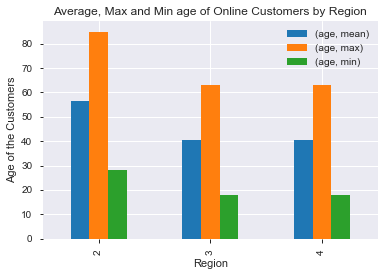

In [6]:

fig = plt.figure()
demo_data[demo_data['in-store']==0].groupby('region').agg({'age':['mean','max','min']}).plot(kind ='bar',legend = False)
plt.xlabel("Region")
plt.ylabel("Age of the Customers")
plt.title ("Average, Max and Min age of Online Customers by Region")
plt.legend()

In [7]:
# Age of Customers buying Online

OnlineCustAge = demo_data[demo_data['in-store']==0].groupby('region').agg({'age':['mean','max','min']})
OnlineCustAge

age        
             mean max min
region                   
2       56.610350  85  28
3       40.480360  63  18
4       40.523348  63  18

### Visual representation of the Age Of Customers buying in Store

<Figure size 432x288 with 0 Axes>

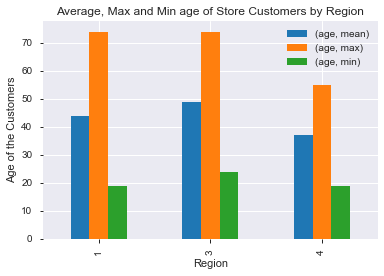

In [8]:

fig = plt.figure()
demo_data[demo_data['in-store']==1].groupby('region').agg({'age':['mean','max','min']}).plot(kind ='bar',legend = False)
plt.xlabel("Region")
plt.ylabel("Age of the Customers")
plt.title ("Average, Max and Min age of Store Customers by Region")
plt.legend()



In [9]:
# Age Of Customers buying in store

In [10]:
demo_data[demo_data['in-store']==1].groupby('region').agg({'age':['mean','max','min']})

age        
             mean max min
region                   
1       43.703938  74  19
3       48.935540  74  24
4       36.978386  55  19

In [11]:
# Copying the data into new dataframe 

demo_data_Agebin = demo_data.copy()
demo_data_Agebin

,in-store,age,items,amount,region
0,0,37,4,281.03,2
1,0,35,2,219.51,2
2,1,45,3,1525.70,4
3,1,46,3,715.25,3
4,1,33,4,1937.50,1
...,...,...,...,...,...
79995,1,71,3,558.82,1
79996,0,59,7,1932.00,3
79997,0,54,1,414.16,2
79998,1,49,4,335.32,1


### Discretization of Age attribute

In [12]:

demo_data_Agebin['Age_group'] = pd.cut(x = demo_data_Agebin['age'], bins = [10,20, 40, 60,80,100],
                                       labels = ['Teens', 'Adult','40s-60s','Old','Very Old'])
demo_data_Agebin.head(5)


,in-store,age,items,amount,region,Age_group
0,0,37,4,281.03,2,Adult
1,0,35,2,219.51,2,Adult
2,1,45,3,1525.70,4,40s-60s
3,1,46,3,715.25,3,40s-60s
4,1,33,4,1937.50,1,Adult


### Visual Representation of Which age group contributes to Sales

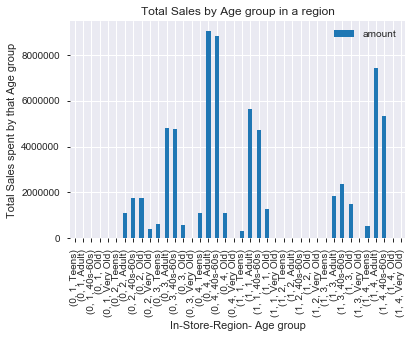

In [13]:
# Total Sales grouped by Mode-Region- Age group

fig = plt.figure()
demo_data_Agebin.groupby(['in-store','region','Age_group'])['amount'].sum(). plot(kind='bar')
plt.xlabel("In-Store-Region- Age group")
plt.ylabel("Total Sales spent by that Age group")
plt.title ("Total Sales by Age group in a region")
plt.legend()


#### From above chart we can infer that Adults and 40s-60's age group Contributes more to the Sales

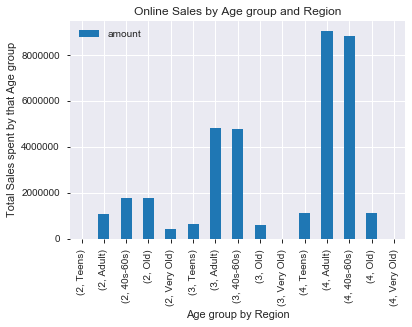

In [14]:
# Total Online Sales grouped by Mode-Region- Age group

demo_data_Agebin[demo_data_Agebin['in-store']==0].groupby(['region','Age_group'])['amount'].sum(). plot(kind='bar')
plt.xlabel("Age group by Region")
plt.ylabel("Total Sales spent by that Age group")
plt.title ("Online Sales by Age group and Region")
plt.legend()

#### Observation:
    
    - Online Sales in Region 3 and 4 are mainly from Age group Adult(20-40's) and 40s-60's
    - No Online Sales in Region 1
    - Region 2 has very old people (Age>80) and they buy online                                                                 
                                                                     
                                                                     

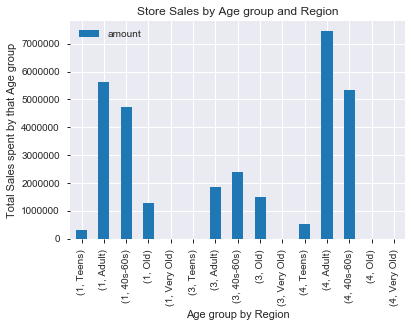

In [15]:
# Total Store Sales grouped by Mode-Region- Age group

demo_data_Agebin[demo_data_Agebin['in-store']==1].groupby(['region','Age_group'])['amount'].sum(). plot(kind='bar')
plt.xlabel("Age group by Region")
plt.ylabel("Total Sales spent by that Age group")
plt.title ("Store Sales by Age group and Region")
plt.legend()

In [16]:
# Checking the contribution of Age group 20-60 to Total sales

# Display numbers in floating point

pd.options.display.float_format = '{:.2f}'.format

print ("Total Sales of the Company    :"," %8.2f" % demo_data['amount'].sum())

print ("Total Sales by Age group 20-40:"," %8.2f" %demo_data[(demo_data['age']>=20)&(demo_data['age']<=40)]['amount'].sum())

print ("Total Sales by Age group 40-60:"," %8.2f" % demo_data[(demo_data['age']>=40)&(demo_data['age']<=60)]['amount'].sum())

print ("Total Sales by Age group 20-60:", " %8.2f" %demo_data[(demo_data['age']>=20)&(demo_data['age']<=60)]['amount'].sum())




Total Sales of the Company    :  66873573.57
Total Sales by Age group 20-40:  31126568.14
Total Sales by Age group 40-60:  29305415.39
Total Sales by Age group 20-60:  58928412.86


In [17]:
print ("Online and Store Sales by 20-40\n", 
       demo_data[(demo_data['age']>=20)&(demo_data['age']<=40)].groupby('in-store')['amount'].sum())

print ("\nOnline and Store Sales by 40-60\n",
       demo_data[(demo_data['age']>=40)&(demo_data['age']<=60)].groupby('in-store')['amount'].sum())

Online and Store Sales by 20-40
 in-store
0   15640382.26
1   15486185.89
Name: amount, dtype: float64

Online and Store Sales by 40-60
 in-store
0   16113925.57
1   13191489.83
Name: amount, dtype: float64


### Summary of Data Analysis:
   #### Customers in Region 1 buy only in store and majority of the sales are from Adults and 40s-60s Age group
   #### Customers in Region 2 buy only online and there are Customers > 80 yrs old only in Region 2
   #### Customers in Region 3 prefers Online to Store and majority of the sales are from Adults and 40s-60's 
   #### Customers in Region 4 buy both Online and in Store and majority of the sales are from Adults and 40s-60's
   #### Customers aged 20s-40s buy from both Online and Store equally
   #### 88% of the Company Sales are from Customers aged 20-60 and 46% of the Sales are just from 20-40.